In [28]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Importing the necessary data
df = pd.read_excel('Q3_Sikka data.xlsx')
print('df',df.shape)
df.head()

df (46, 6)


,Date,DAU,Installs,Uninstalls,Signups,Referrals
0,2022-10-01,24071,6630,6994,3511,962.0
1,2022-10-02,23548,6366,6669,3387,941.0
2,2022-10-03,24572,6936,6899,3654,940.0
3,2022-10-04,24212,6561,6766,3532,960.0
4,2022-10-05,23247,6059,6402,3315,923.0


In [30]:
# Checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        46 non-null     datetime64[ns]
 1   DAU         46 non-null     int64         
 2   Installs    46 non-null     int64         
 3   Uninstalls  46 non-null     int64         
 4   Signups     46 non-null     int64         
 5   Referrals   31 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 2.3 KB


In [31]:
# Inspecting the null values in the dataset
df.isnull().sum()

Date           0
DAU            0
Installs       0
Uninstalls     0
Signups        0
Referrals     15
dtype: int64

In [32]:
train_df=df[df.Referrals.notnull()]
print('train_df',train_df.shape)
train_df.head()

train_df (31, 6)


,Date,DAU,Installs,Uninstalls,Signups,Referrals
0,2022-10-01,24071,6630,6994,3511,962.0
1,2022-10-02,23548,6366,6669,3387,941.0
2,2022-10-03,24572,6936,6899,3654,940.0
3,2022-10-04,24212,6561,6766,3532,960.0
4,2022-10-05,23247,6059,6402,3315,923.0


In [33]:
test_df=df[df.Referrals.isnull()]
test_df.drop('Referrals',axis=1,inplace=True)
print('test_df',test_df.shape)
test_df.head()

test_df (15, 5)


,Date,DAU,Installs,Uninstalls,Signups
31,2022-11-01,12816,3763,4149,1806
32,2022-11-02,12812,3087,3868,1550
33,2022-11-03,12042,3176,3815,1410
34,2022-11-04,12595,3172,3878,1629
35,2022-11-05,12361,3390,4021,1578


In [34]:
train_df.corr()['Referrals'].sort_values()

DAU           0.918227
Installs      0.921538
Uninstalls    0.922248
Signups       0.965688
Referrals     1.000000
Name: Referrals, dtype: float64

##### * All the variables have strong positive correlation with referrals

In [35]:
train_df.skew()

DAU          -0.421082
Installs      0.037388
Uninstalls   -0.216499
Signups       0.153072
Referrals     0.073963
dtype: float64

##### * All the features are having almost a normal distribution, we can say DAU is slightly left skewed.We can ignore for this analysis as it is less.

In [36]:
# We can drop the date column since its not useful for prediction
train_df.drop('Date',axis=1,inplace=True)

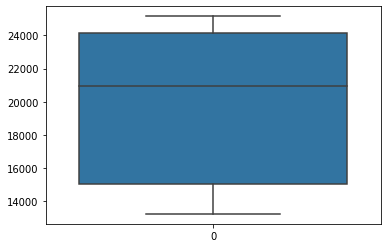

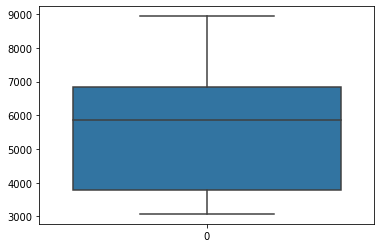

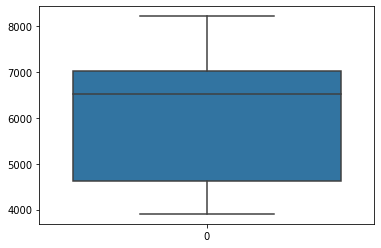

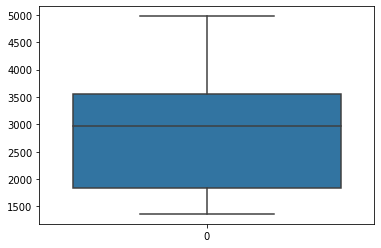

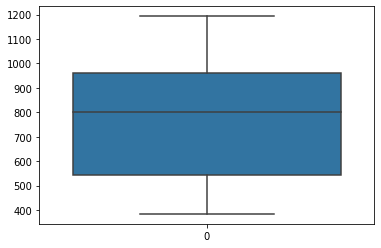

In [37]:
# Checking for outliers
for col in train_df.columns:
    sns.boxplot(train_df[col])
    plt.show()

##### * There are no outliers in any of the features

In [38]:
# Splitting into train and test for model building
x_train=train_df.drop('Referrals',axis=1)
y_train=train_df['Referrals']

x_test=test_df.drop('Date',axis=1)

print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)
print('y_train shape:',y_train.shape)

x_train shape: (31, 4)
x_test shape: (15, 4)
y_train shape: (31,)


In [39]:
x_train.head()

,DAU,Installs,Uninstalls,Signups
0,24071,6630,6994,3511
1,23548,6366,6669,3387
2,24572,6936,6899,3654
3,24212,6561,6766,3532
4,23247,6059,6402,3315


In [40]:
y_train.head()

0    962.0
1    941.0
2    940.0
3    960.0
4    923.0
Name: Referrals, dtype: float64

In [41]:
x_test.head()

,DAU,Installs,Uninstalls,Signups
31,12816,3763,4149,1806
32,12812,3087,3868,1550
33,12042,3176,3815,1410
34,12595,3172,3878,1629
35,12361,3390,4021,1578


In [42]:
# Using standard scaler to scale the data set

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=pd.DataFrame(ss.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(ss.transform(x_test),columns=x_test.columns)

print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)
print('y_train shape:',y_train.shape)

x_train shape: (31, 4)
x_test shape: (15, 4)
y_train shape: (31,)


In [43]:
x_train.head()

,DAU,Installs,Uninstalls,Signups
0,0.925445,0.614418,0.690245,0.616447
1,0.805100,0.455266,0.443318,0.495171
2,1.040728,0.798889,0.618066,0.756307
3,0.957890,0.572822,0.517016,0.636986
4,0.735839,0.270192,0.240457,0.424752


In [44]:
y_train.head()

0    962.0
1    941.0
2    940.0
3    960.0
4    923.0
Name: Referrals, dtype: float64

In [45]:
x_test.head()

,DAU,Installs,Uninstalls,Signups
0,-1.664387,-1.113945,-1.471320,-1.051106
1,-1.665307,-1.521470,-1.684818,-1.301483
2,-1.842488,-1.467816,-1.725086,-1.438409
3,-1.715240,-1.470228,-1.677220,-1.224219
4,-1.769085,-1.338807,-1.568572,-1.274098


In [47]:
# Building a basic linear regression model to predict the referrals

from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [58]:
# rounding off to 2 decimal places
y_pred=(pd.DataFrame(y_pred,columns=['Referrals'])).round(2)
y_pred

,Referrals
0,495.15
1,459.46
2,410.56
3,473.24
4,446.48
5,475.01
6,441.08
7,472.43
8,516.30
9,527.80


In [59]:
#Final predicted values for 15 days of Nov
final_ref=pd.concat([test_df.reset_index(drop=True),y_pred],axis=1)
final_ref

,Date,DAU,Installs,Uninstalls,Signups,Referrals
0,2022-11-01,12816,3763,4149,1806,495.15
1,2022-11-02,12812,3087,3868,1550,459.46
2,2022-11-03,12042,3176,3815,1410,410.56
3,2022-11-04,12595,3172,3878,1629,473.24
4,2022-11-05,12361,3390,4021,1578,446.48
5,2022-11-06,13166,3441,4071,1656,475.01
6,2022-11-07,12565,3468,4011,1556,441.08
7,2022-11-08,12988,4468,4143,1808,472.43
8,2022-11-09,12992,4491,4638,2017,516.30
9,2022-11-10,13377,4261,4480,1997,527.80
